**Import necessary Libraries**

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [86]:
titanic = pd.read_csv('/content/tested.csv')

In [87]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
titanic.shape

(418, 12)

# **Analysis Data**

<Axes: xlabel='Survived', ylabel='count'>

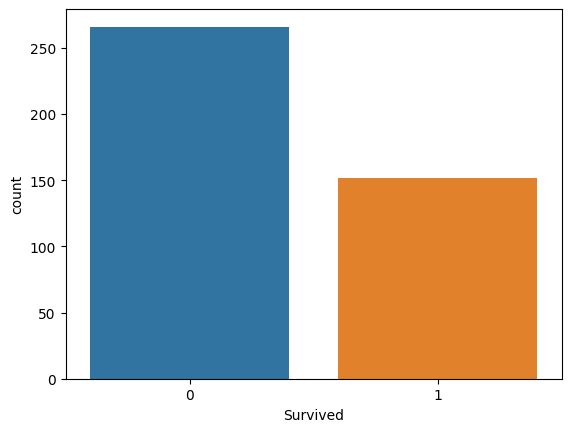

In [89]:
sns.countplot(x='Survived', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

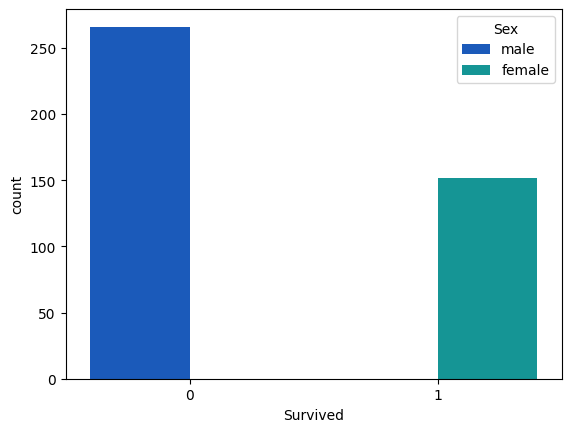

In [90]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

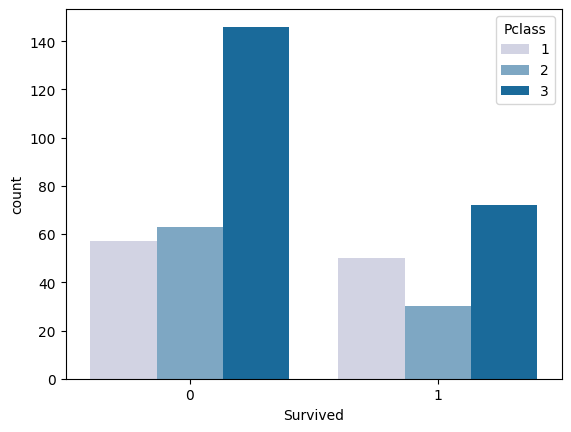

In [91]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='PuBu')

<Axes: ylabel='Frequency'>

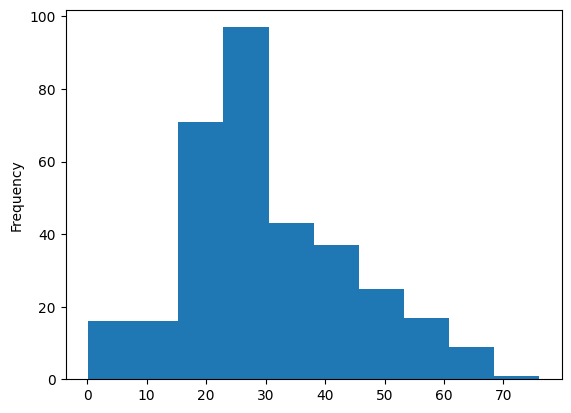

In [92]:
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

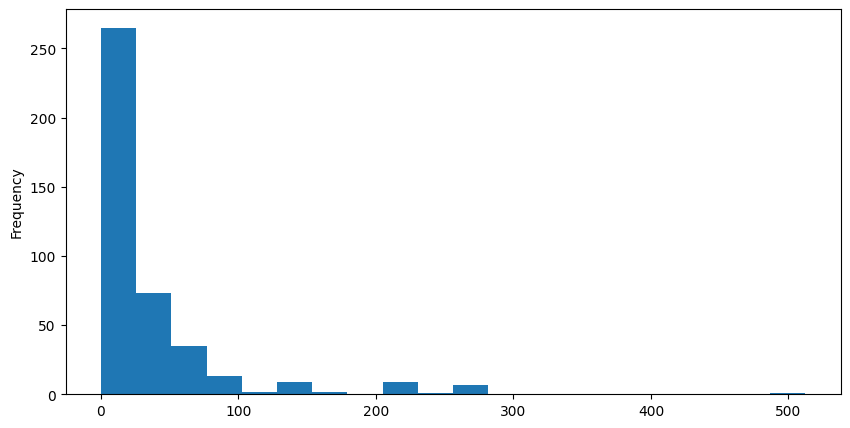

In [93]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

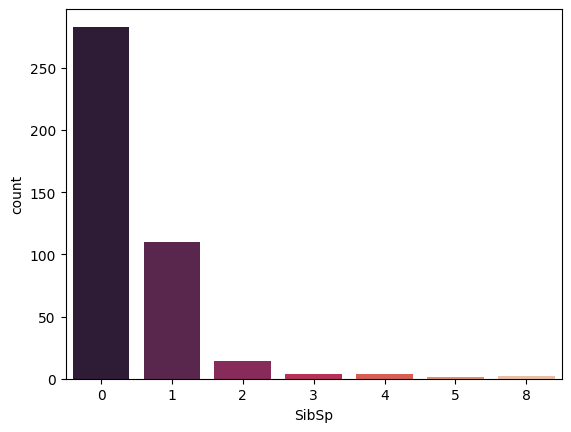

In [94]:
sns.countplot(x='SibSp', data=titanic, palette='rocket')

<Axes: ylabel='Frequency'>

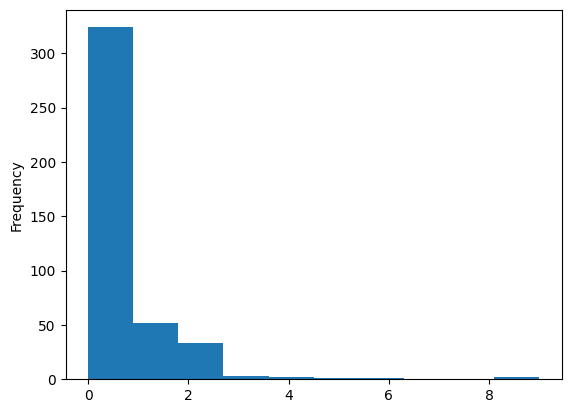

In [95]:
titanic['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

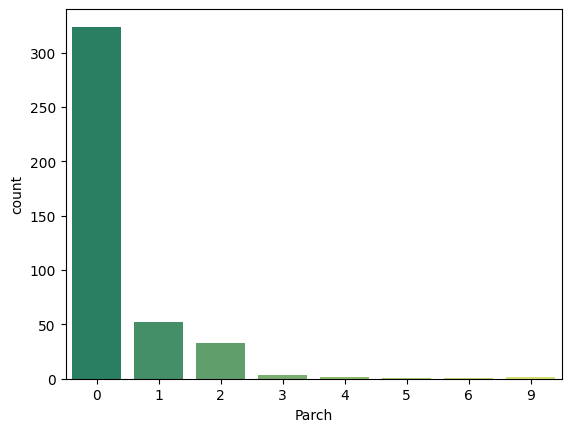

In [96]:
sns.countplot(x='Parch',data=titanic, palette='summer')

# **DATA WRANGLING**

In [97]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

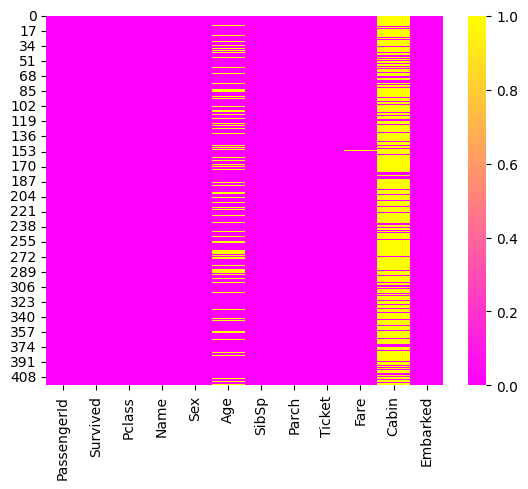

In [98]:
sns.heatmap(titanic.isnull(), cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

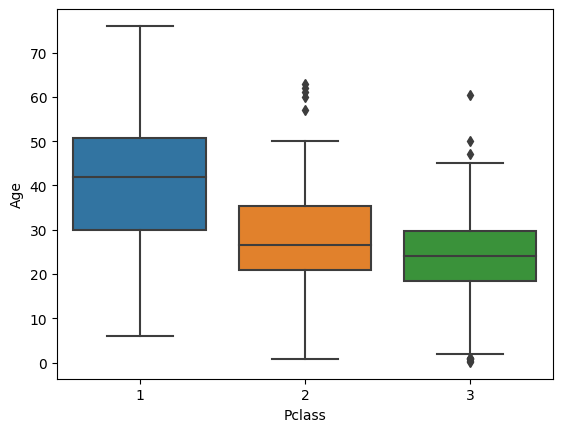

In [99]:
sns.boxplot(x='Pclass', y='Age',data=titanic)

In [100]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
titanic.drop('Cabin',axis=1,inplace=True)

In [102]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S


In [103]:
titanic.dropna(inplace=True)

<Axes: >

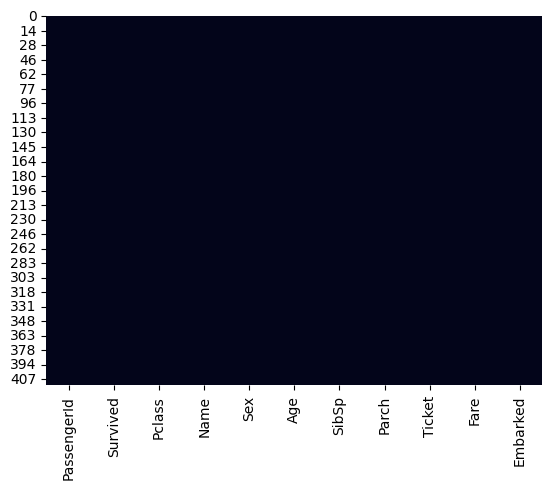

In [104]:
sns.heatmap(titanic.isnull(),cbar=False)

In [105]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [106]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [107]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [108]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head(3)

,male
0,1
1,0
2,1


In [109]:
embark=pd.get_dummies(titanic['Embarked'])
embark.head(3)

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0


In [110]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head(3)

,Q,S
0,1,0
1,0,1
2,1,0


In [111]:
pcl=pd.get_dummies(titanic['Pclass'],drop_first=True)
pcl.head(3)

,2,3
0,0,1
1,0,1
2,1,0


In [112]:
titanic=pd.concat([titanic,sex,embark,pcl],axis=1)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0


In [113]:
titanic.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'], axis=1,)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
409,1,3.0,1,1,13.7750,0,0,1,0,1
411,1,37.0,1,0,90.0000,0,1,0,0,0
412,1,28.0,0,0,7.7750,0,0,1,0,1
414,1,39.0,0,0,108.9000,0,0,0,0,0


**Train Data**

In [121]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(331, 15) (264, 15) (67, 15)


**Logistic Regression**

In [197]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#regressor.fit(X_train, y_train)

In [184]:
LogisticRegression.__init__(X_train,y_train)

In [200]:
prediction = model.predict(X_test)

In [192]:
from sklearn.metrics import classification_report

In [194]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,prediction)

In [195]:
from sklearn.metrics import accuracy_score

In [201]:
accuracy_score(y_test,prediction)

0.8357446808510639


We have if 83% accuracy in the Model can predict the data quite accurately